# Problem Definition and Objective 




The primary goal of this project is to develop a robust, unbiased classification framework to optimize ad-targeting strategies. The specific objectives are:

Engineering a Non-Biased Model: Transition from baseline linear models to a Random Forest Classifier utilizing balanced class weights to improve the detection of non-clicking users from 0.01 to 0.50 Recall.

Isolating Demographic Drivers: Identify and quantify the key features driving engagement, specifically validating Age as the primary predictor with a high importance score of 0.44.

Predicting Engagement Probabilities: Move beyond simple binary classification to generate granular click probabilities, identifying high-priority segments such as the 18-24 age demographic (which shows an 86.4% click probability).

Validating Findings for Bias: Utilize Median-based Box Plots to ensure that these high probabilities represent consistent group behavior rather than being skewed by statistical outliers.

# Data Understanding and Preparation

### Data Loading and Initial Exploration

The data used in this analysis is sourced from [Kaggle](https://www.kaggle.com)  
**Source**: [Dataset Link](https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset)  
**Format**: CSV



In [93]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# load the data

data=pd.read_csv("ad_click_dataset.csv")
data.head()


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


### Basic Data Exploration

In [96]:
# Display Basic Information

print("Dataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [97]:
# Information on Numerical features of the data

data.describe()


,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [98]:
# Information on Categorical features of the data

data.describe(include=['object'])

,full_name,gender,device_type,ad_position,browsing_history,time_of_day
count,10000,5307,8000,8000,5218,8000
unique,4000,3,3,3,5,4
top,User1171,Female,Desktop,Bottom,Entertainment,Morning
freq,25,1834,2754,2817,1175,2126


In [99]:
# Calculating the Average click rate

avg_click_rate=data.click.mean()
avg_click_rate

0.65

In [100]:
# Dropping the identifiers

data=data.drop(columns=['id','full_name'])
data.head()


,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,NaN,Male,Desktop,Top,NaN,NaN,1
2,41.0,Non-Binary,NaN,Side,Education,Night,1
3,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0



--- device_type vs Click (Proportions) ---
click               0         1
device_type                    
Desktop      0.335875  0.664125
Mobile       0.366553  0.633447
Tablet       0.351945  0.648055
Unknown      0.345000  0.655000

--- ad_position vs Click (Proportions) ---
click               0         1
ad_position                    
Bottom       0.312744  0.687256
Side         0.368523  0.631477
Top          0.365037  0.634963
Unknown      0.359000  0.641000

--- browsing_history vs Click (Proportions) ---
click                    0         1
browsing_history                    
Education         0.372206  0.627794
Entertainment     0.312340  0.687660
News              0.408811  0.591189
Shopping          0.354675  0.645325
Social Media      0.364326  0.635674
Unknown           0.338352  0.661648

--- time_of_day vs Click (Proportions) ---
click               0         1
time_of_day                    
Afternoon    0.314484  0.685516
Evening      0.370276  0.629724
Morning    

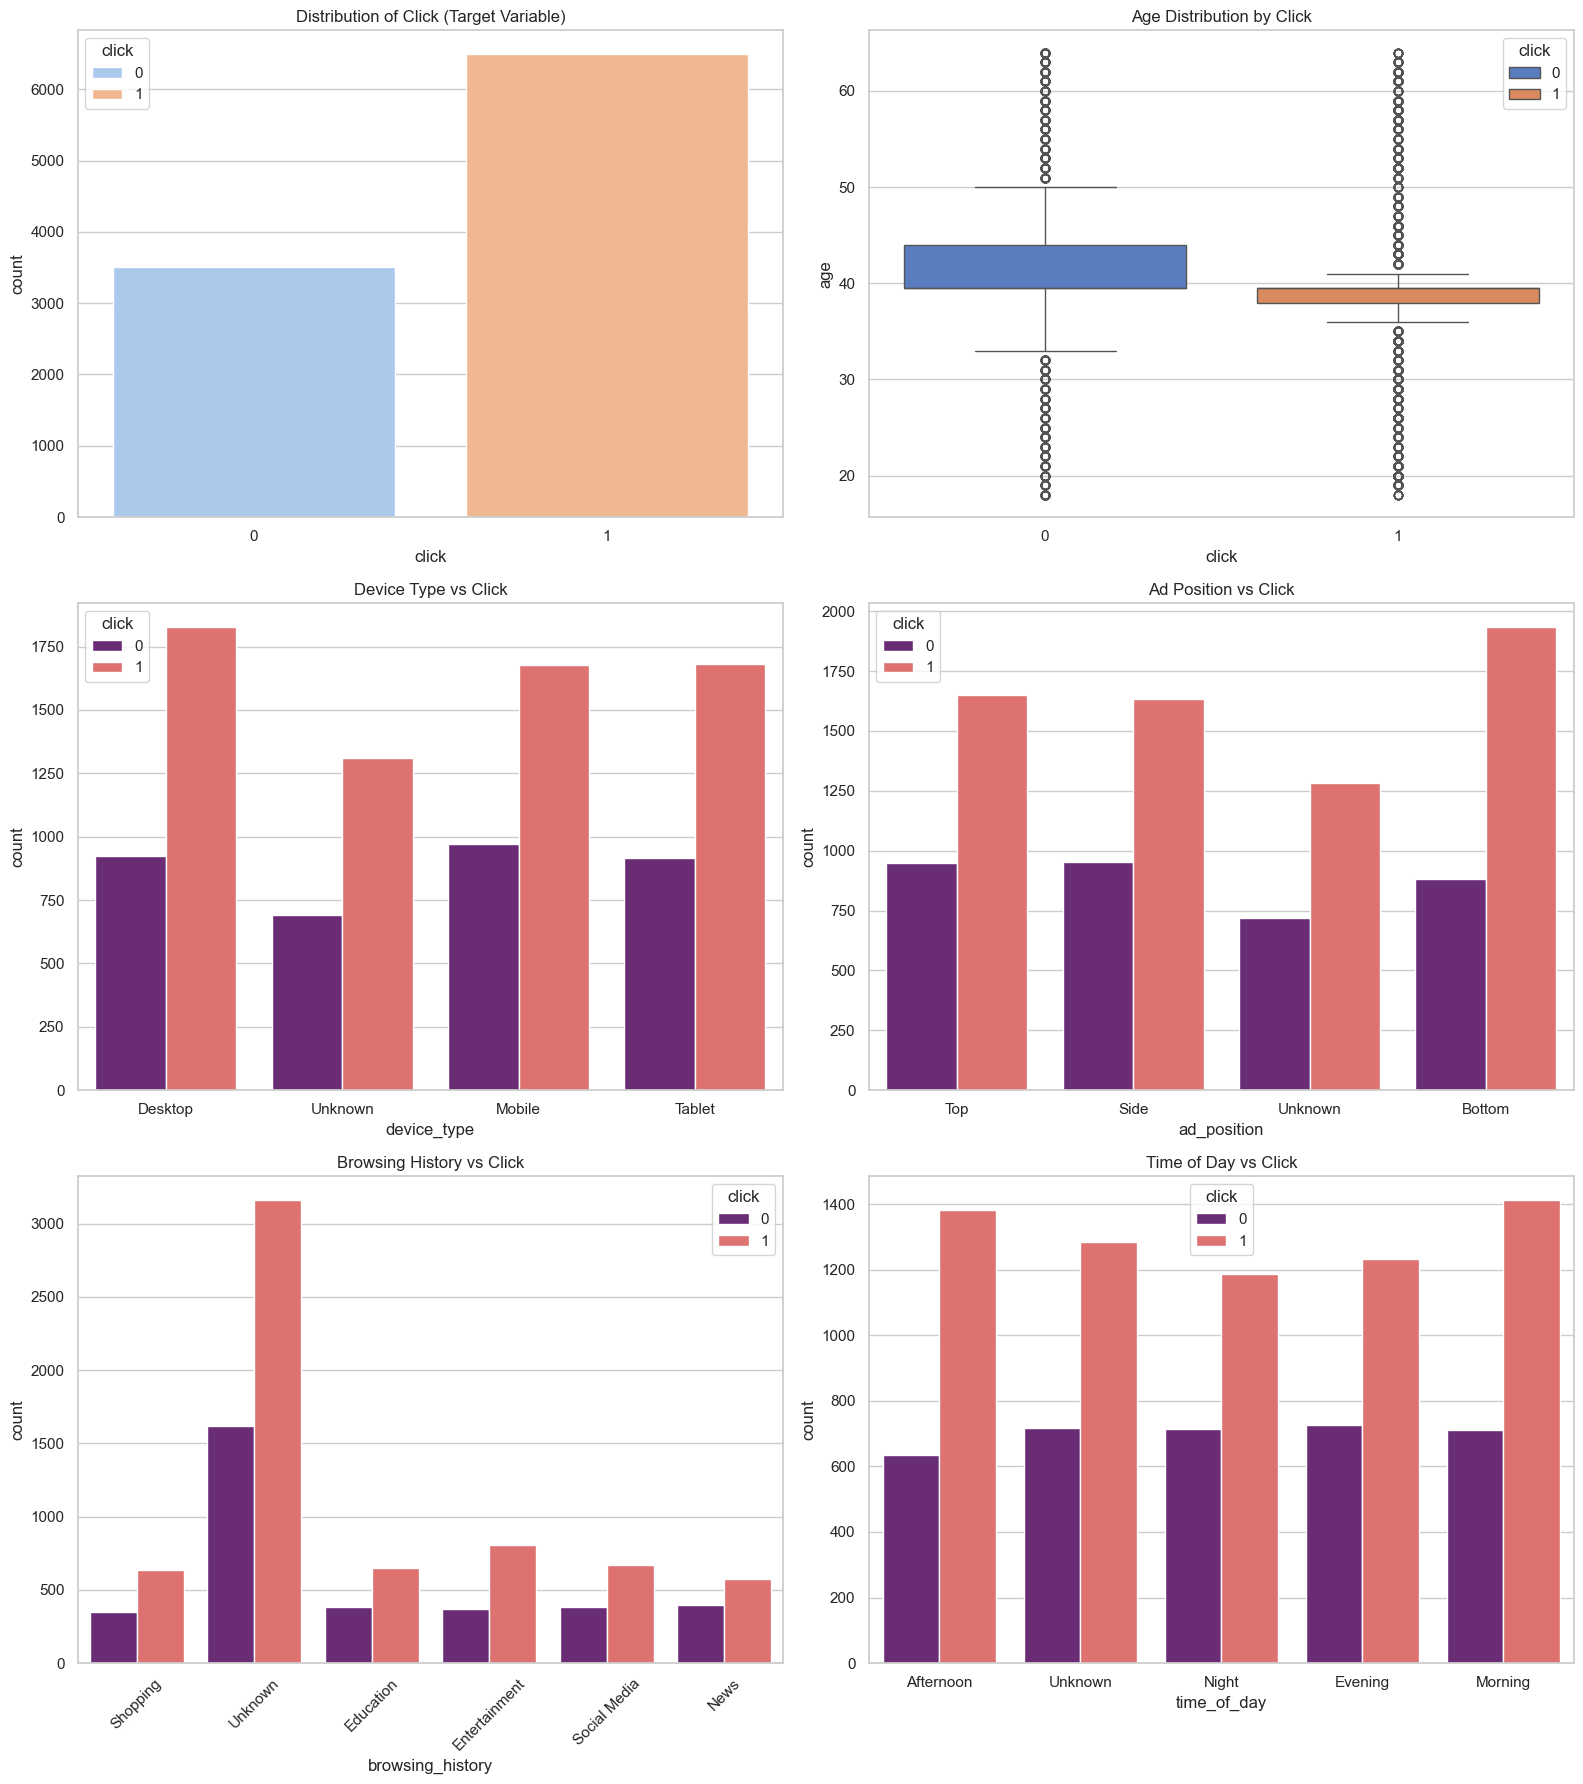

In [131]:
# Basic Visualization

# Set the style
sns.set_theme(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Click distribution (Target)
sns.countplot(ax=axes[0, 0], x='click', data=data,hue='click', palette='pastel')
axes[0, 0].set_title('Distribution of Click (Target Variable)')

# 2. Age vs Click
sns.boxplot(ax=axes[0, 1], x='click', y='age',hue='click', data=data, palette='muted')
axes[0, 1].set_title('Age Distribution by Click')

# 3. Device Type vs Click
sns.countplot(ax=axes[1, 0], x='device_type', hue='click', data=data, palette='magma')
axes[1, 0].set_title('Device Type vs Click')

# 4. Ad Position vs Click
sns.countplot(ax=axes[1, 1], x='ad_position', hue='click', data=data, palette='magma')
axes[1, 1].set_title('Ad Position vs Click')

# 5. Browsing History vs Click
sns.countplot(ax=axes[2, 0], x='browsing_history', hue='click', data=data, palette='magma')
axes[2, 0].set_title('Browsing History vs Click')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Time of Day vs Click
sns.countplot(ax=axes[2, 1], x='time_of_day', hue='click', data=data, palette='magma')
axes[2, 1].set_title('Time of Day vs Click')

plt.tight_layout()


# Calculate percentages for deeper insights
cat_cols = ['device_type', 'ad_position', 'browsing_history', 'time_of_day', 'gender']
for col in cat_cols:
    print(f"\n--- {col} vs Click (Proportions) ---")
    print(data.groupby(col)['click'].value_counts(normalize=True).unstack())

### Handling Missing Values

In [103]:
# Calculating the number of missing values

data.isnull().sum()

age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

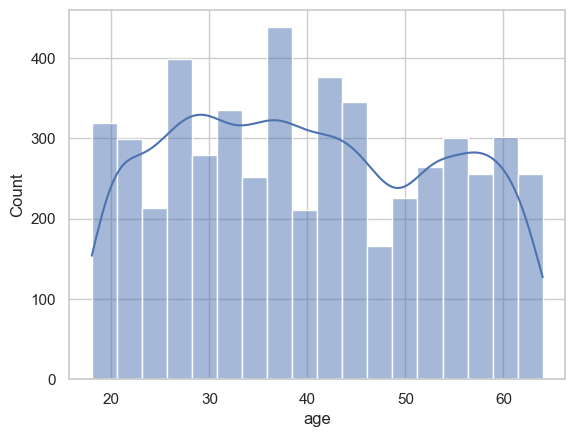

In [104]:
# Distribution of 'Age'

sns.histplot(data=data,x="age",kde=True)

<Axes: ylabel='age'>

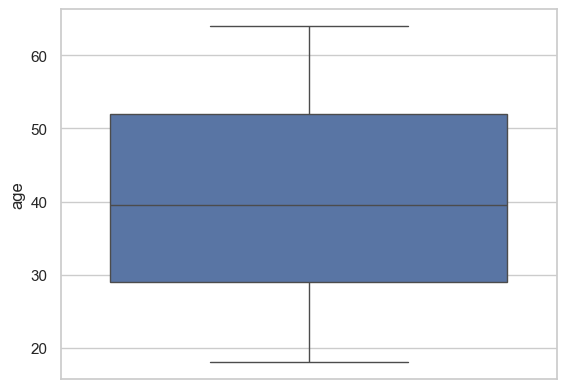

In [105]:
# Checking Outliers through Boxplot

sns.boxplot(data=data,y="age")

In [106]:
#Filling missing values in numerical features

data['age']=data['age'].fillna(data['age'].median())



#Filling missing values in categorical features

data['gender']=data['gender'].fillna('Unknown')
data['browsing_history']=data['browsing_history'].fillna('Unknown')
data['time_of_day']=data['time_of_day'].fillna('Unknown')
data['device_type']=data['device_type'].fillna('Unknown')
data['ad_position']=data['ad_position'].fillna('Unknown')
data


,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1
1,39.5,Male,Desktop,Top,Unknown,Unknown,1
2,41.0,Non-Binary,Unknown,Side,Education,Night,1
3,34.0,Male,Unknown,Unknown,Entertainment,Evening,1
4,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0
...,...,...,...,...,...,...,...
9995,39.5,Unknown,Mobile,Top,Education,Unknown,0
9996,39.5,Female,Desktop,Bottom,Entertainment,Unknown,0
9997,39.5,Male,Mobile,Side,Unknown,Morning,0
9998,39.5,Unknown,Desktop,Unknown,Shopping,Morning,1


In [107]:
# Checking whether the target variable 'click' is balanced or imbalanced

# Check raw counts
class_counts=data['click'].value_counts()
print(class_counts)


click
1    6500
0    3500
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution - Pie Chart')

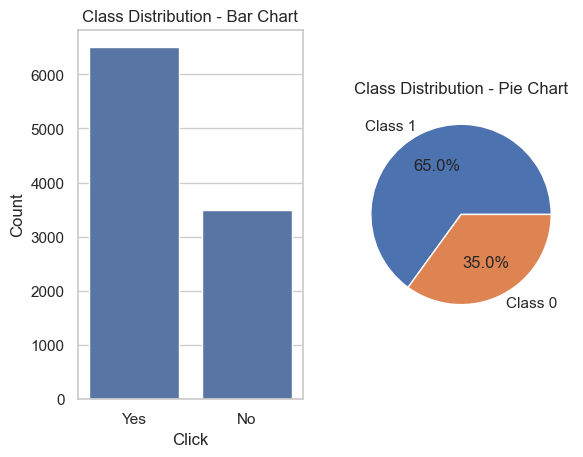

In [108]:
# Visualizing the class imbalance through Bar Plot and Pie Chart

# 1. Bar plot

labels=["Yes","No"]
class_count=[6500,3500]

plt.subplot(1,2,1)
sns.barplot(x=labels,y=class_count)
plt.title("Class Distribution - Bar Chart")
plt.xlabel("Click")
plt.ylabel("Count")

# 2. Pie Chart

class_counts = data['click'].value_counts()
plt.subplot(1,2,2)
plt.pie(class_counts, labels=['Class 1', 'Class 0'],autopct='%1.1f%%')
plt.title('Class Distribution - Pie Chart')










In [109]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder

# 1. Define the categorical columns
categorical_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

# 2. Initialize the OneHotEncoder

# sparse_output=False returns a standard array (easier to read)
# handle_unknown='ignore' ensures the model doesn't crash if it sees a new category later

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3. Fit and Transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_cols])

# 4. Convert back to a DataFrame with clear column names

encoded_cols = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)
print("Encoded data frame")
print(df_encoded)

# 5. Combine with 'age' and the target 'click'
# We drop the original columns and keep the numerical ones
df_final = pd.concat([data[['age', 'click']], df_encoded], axis=1)

print("Final dataset shape", df_final.shape)
print(df_final.head())


Encoded data frame
      gender_Female  gender_Male  gender_Non-Binary  gender_Unknown  \
0               0.0          0.0                0.0             1.0   
1               0.0          1.0                0.0             0.0   
2               0.0          0.0                1.0             0.0   
3               0.0          1.0                0.0             0.0   
4               0.0          0.0                1.0             0.0   
...             ...          ...                ...             ...   
9995            0.0          0.0                0.0             1.0   
9996            1.0          0.0                0.0             0.0   
9997            0.0          1.0                0.0             0.0   
9998            0.0          0.0                0.0             1.0   
9999            0.0          1.0                0.0             0.0   

      device_type_Desktop  device_type_Mobile  device_type_Tablet  \
0                     1.0                 0.0              

In [110]:
# Running Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Separate Features (X) and Target (y)
X = df_final.drop('click', axis=1)
y = df_final['click']

# 2. Split into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the Logistic Regression Model
model = LogisticRegression()


# 5.Cross validation

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(scores)
print(f"Average Accuracy: {scores.mean()}")

# 6. Final Model Fit

model.fit(X_train_scaled, y_train)




[0.648125 0.65125  0.65375  0.65125  0.65    ]
Average Accuracy: 0.650875


LogisticRegression()

In [111]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

# 6. Check the Results
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 64.60%

--- Confusion Matrix ---
[[   5  700]
 [   8 1287]]


In [112]:
from sklearn.metrics import classification_report

# Generate the report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.38      0.01      0.01       705
           1       0.65      0.99      0.78      1295

    accuracy                           0.65      2000
   macro avg       0.52      0.50      0.40      2000
weighted avg       0.55      0.65      0.51      2000



In [113]:
# Re-running Logistic Regression


# 1. Redefine with 'balanced' weights
model = LogisticRegression(class_weight='balanced')

# 2. Re-fit the model
model.fit(X_train_scaled, y_train)

# 3. Get new predictions
y_pred_new = model.predict(X_test_scaled)

# 6. Check the Results
print(f"Model Accuracy: {accuracy_score(y_test, y_pred_new):.2%}")
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_new))

# 4. Print the new report
print(classification_report(y_test, y_pred_new))



Model Accuracy: 53.95%

--- Confusion Matrix ---
[[376 329]
 [592 703]]
              precision    recall  f1-score   support

           0       0.39      0.53      0.45       705
           1       0.68      0.54      0.60      1295

    accuracy                           0.54      2000
   macro avg       0.53      0.54      0.53      2000
weighted avg       0.58      0.54      0.55      2000



In [114]:
from sklearn.ensemble import RandomForestClassifier

# 1. Define the Model (Using 'balanced' to help with the class imbalance)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 2. Train the Model
rf_model.fit(X_train_scaled, y_train)

# 3. Predict and Report
y_pred_rf = rf_model.predict(X_test_scaled)


# 5. Evaluation Metrics
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2%}")
print(classification_report(y_test, y_pred_rf))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 69.15%
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       705
           1       0.74      0.80      0.77      1295

    accuracy                           0.69      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.68      0.69      0.69      2000


--- Confusion Matrix ---
[[ 350  355]
 [ 262 1033]]


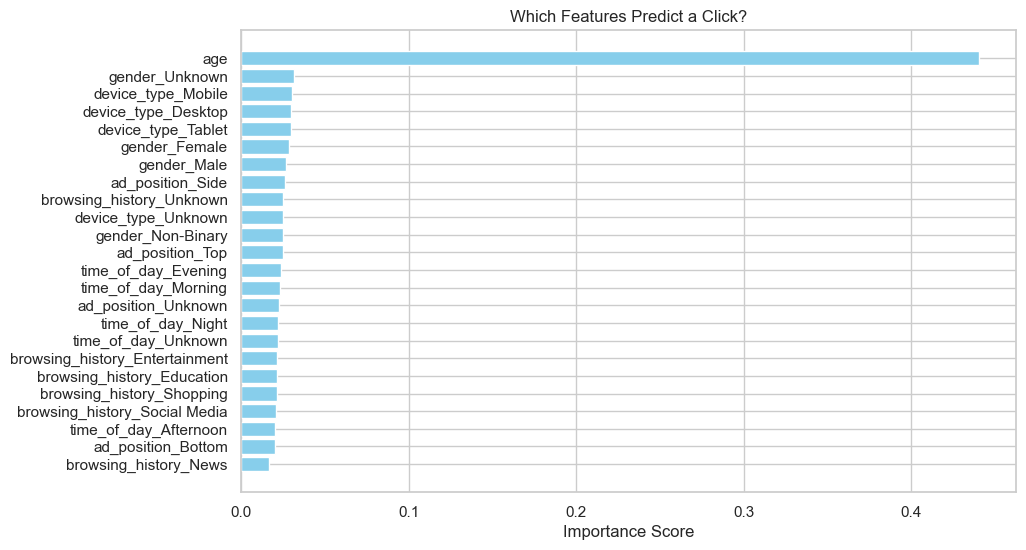

In [115]:
# 1. Get importance scores from your trained Random Forest
importances = rf_model.feature_importances_

# 2. Match scores to column names and sort them
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True) # Sort for plot

# 3. Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.title('Which Features Predict a Click?')
plt.xlabel('Importance Score')
plt.show()

In [116]:
# 1. Get the probabilities for the test set
probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# 2. Create a summary table
# We use the original X_test (before scaling) to see the actual Age values
comparison_df = pd.DataFrame({
    'User_Age': X_test['age'],
    'Actual_Click': y_test,
    'Predicted_Click': y_pred_rf,
    'Click_Probability': probs
})

# 3. Sort by Age to see the trend
comparison_df = comparison_df.sort_values(by='User_Age')

# 4. Display the top 10 rows
print(comparison_df.head(10))

      User_Age  Actual_Click  Predicted_Click  Click_Probability
7162      18.0             0                0           0.190000
2288      18.0             0                1           0.708287
5638      18.0             0                0           0.180000
2344      18.0             0                1           0.678276
6161      18.0             0                1           0.650000
8241      18.0             0                1           0.560000
2406      18.0             0                1           0.503494
4751      18.0             0                0           0.386130
2304      18.0             0                0           0.430000
3027      18.0             0                0           0.260000


In [121]:

# 1. Combine Age and Click Probabilities into a DataFrame

probs = rf_model.predict_proba(X_test_scaled)[:, 1]
df_probs = pd.DataFrame({'age': X_test['age'], 'probability': probs})

# 2. Define Age Ranges (Bins)
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# 3. Assign each user to a range
df_probs['age_range'] = pd.cut(df_probs['age'], bins=bins, labels=labels)

# 4. Group by Range and find the Average Probability
age_summary = df_probs.groupby('age_range',observed=False)['probability'].median().reset_index()
print(age_summary)



  age_range  probability
0     18-24     0.864336
1     25-34     0.837523
2     35-44     0.651861
3     45-54     0.664735
4     55-64     0.704590


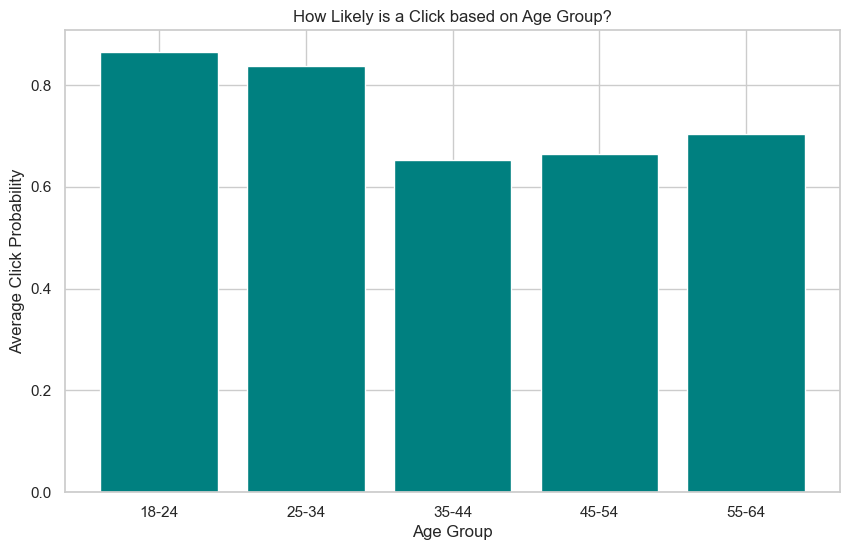

In [123]:
plt.figure(figsize=(10, 6))
plt.bar(age_summary['age_range'], age_summary['probability'], color='teal')
plt.ylabel('Average Click Probability')
plt.xlabel('Age Group')
plt.title('How Likely is a Click based on Age Group?')
plt.show()

In [ ]:
# Visualizing the spread of probabilities within each user age range

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_range', y='probability', data=df_probs, palette='Set3',hue='age_range')
plt.title('Distribution of Click Probabilities by Age Group')
plt.ylabel('Click Probability')
plt.xlabel('Age Range')
plt.show()